In [1]:
from fastai2.vision.all import *
path =  Path('/notebooks/storage/data/hate/data')

In [2]:
df = pd.read_json(path/'data.json')

In [3]:
 dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_x=ColReader('img', pref=f'{path}/'),
                           get_y=ColReader('label'),
                           splitter=ColSplitter('is_valid'),
                           item_tfms=RandomResizedCrop(128),
                           batch_tfms=aug_transforms())
dls = ImageDataLoaders.from_dblock(dblock,df, path)

In [4]:
#dls = ImageDataLoaders.from_df(df, path,fn_col='img', label_col='label',valid_col='is_valid',
#                              item_tfms=RandomResizedCrop(128))

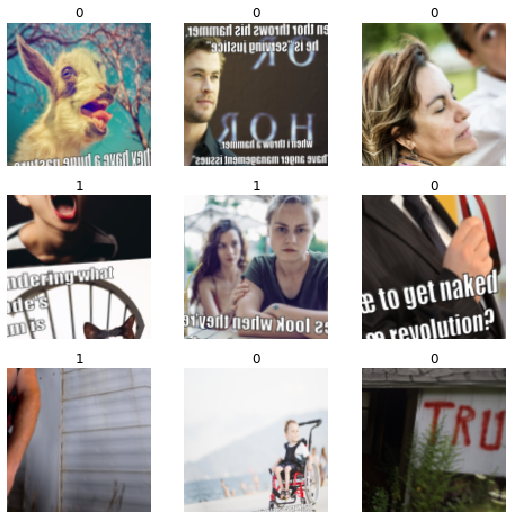

In [5]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, RocAucBinary()])
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.054342,0.819282,0.540000,0.550960,01:04


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.777113,0.740728,0.554000,0.554992,00:32
1,0.703927,0.730323,0.536000,0.553168,00:32
2,0.668518,0.718717,0.516000,0.544640,00:32
3,0.644600,0.736854,0.506000,0.566240,00:32
4,0.635119,0.731695,0.510000,0.569504,00:32


In [139]:
learn.save('res34')

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats
...,...,...,...
995,3869,img/03869.png,a mother's love for the child is a divine thing
996,23817,img/23817.png,sea monkeys
997,56280,img/56280.png,little miss muffet sat on her tuffet
998,29384,img/29384.png,they're in a row


In [154]:
def gen_submit(learn, fname):
    test_df = pd.read_json(path/'test.jsonl', lines=True)
    test_dl = learn.dls.test_dl(test_df)
    preds = learn.get_preds(dl=test_dl)[0]
    probs= preds[:,1]
    submit_df = pd.DataFrame()
    submit_df['id'] = test_df['id']
    submit_df['proba'] = probs
    submit_df['label'] = indcs
    submit_df = submit_df.set_index('id')
    submit_df.to_csv(fname, header=True)

In [155]:
gen_submit(learn, path/'attempt1.csv')

In [148]:
s

In [149]:
submit_df

,proba,label
id,,
16395,0.769978,0
37405,0.599912,0
94180,0.520897,0
54321,0.832810,0
97015,0.543728,1
...,...,...
3869,0.878503,0
23817,0.899243,0
56280,0.724428,0
